__Initial Model Fitting of the LightGBM Model__

In [1]:
from pathlib import Path
import sys 

# Add root dir (Assumed to be parent - to change if its not the case)
root_dir = Path(Path.cwd().as_posix().split('notebooks')[0])
sys.path.append(root_dir.as_posix())


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
def compute_dataset_gini(classifier, x_data, y_data):
    """
    Return gini coefficient for whole dataset using a given classifier

    Parameters
    ----------
    classifier : LogisticRegression
        The given classifier
    x_data : pd.DataFrame
        The given data used as an input for the classifier predict function
    y_data : pd.Series
        The expected output

    Returns
    -------
    gini : float
        The list of the gini coefficient
    """
    y_score_tr = classifier.predict_proba(x_data)
    fpr, tpr, _ = metrics.roc_curve(y_data, y_score_tr[:, 1])
    roc_auc_tr = metrics.auc(fpr, tpr)
    gini = 2 * roc_auc_tr - 1
    return gini

In [5]:
GINI_THR = 0.01
CORR_THR = 0.6

In [10]:
data_modelling = pd.read_csv("../data/modelling_officer_dataset.csv")


/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/3320360872.py:1: DtypeWarning: Columns (615,616,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  data_modelling = pd.read_csv("../data/modelling_officer_dataset.csv")


In [11]:
data_modelling

,officer_number,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_0_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_3_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_6_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_12_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_24_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_36_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_all_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_0_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_3_months,...,filings_max_MG08_max_appt_MG08_6_months,filings_max_MG08_max_appt_MG08_12_months,filings_max_MG08_max_appt_MG08_24_months,filings_max_MG08_max_appt_MG08_36_months,filings_max_MG08_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,472795bd2d0c4e3e00c3fc33740bdfa894cfa55b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nxU7eRDm2Nj8cCYzZyjksG,pol-5rDuDXvjzJHTmwb6zVBfBT,2022-10-12,co-nxU7eRDm2Nj8cCYzZyjksG
1,092c6bc880957f7a9351c43bef9b6f22e1a2fbe8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nxU7eRDm2Nj8cCYzZyjksG,pol-5rDuDXvjzJHTmwb6zVBfBT,2022-10-12,co-nxU7eRDm2Nj8cCYzZyjksG
2,d581900a4614b0f950d0f75dc6f3845a0052129b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nxU7eRDm2Nj8cCYzZyjksG,pol-5rDuDXvjzJHTmwb6zVBfBT,2022-10-12,co-nxU7eRDm2Nj8cCYzZyjksG
3,208fa76aa1a97053dbf03758d57a1fa245f54698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nxU7eRDm2Nj8cCYzZyjksG,pol-5rDuDXvjzJHTmwb6zVBfBT,2022-10-12,co-nxU7eRDm2Nj8cCYzZyjksG
4,e819fdb1c36d9231308495bceb1f4067fcaefc9a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-XqjWxRqAgXm9nvdnPjJq4F,pol-roM66VAicC2tXY6jb8ei9f,2022-10-12,co-XqjWxRqAgXm9nvdnPjJq4F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,40c983af1a4c7f62231eb8c42036068fd412de00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
5931,1816c2575deb9e44d8ed129592ddb694ae2aa9c6,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
5932,27bbbb15d67b9593567c5fa2476550db5e3cc8db,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE
5933,e1b046bff7879f8ff7c4078769e44fc4dc748bde,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-nBjmvCy4wxPKrWXusFD7RE,pol-rY5BDxSfvmR2QMmUjoZTgD,2018-11-13,co-nBjmvCy4wxPKrWXusFD7RE


In [12]:
data_modelling.nationality.nunique()

60

In [13]:
data_modelling.nationality.value_counts()

nationality
GB    4778
IE     152
US     137
FR      95
JP      71
DE      50
IT      39
NL      36
CA      32
CN      26
AU      24
DK      21
IN      20
PL      17
CH      14
ES      11
BE      10
RO      10
SE       9
ZA       9
TR       8
LV       8
NZ       6
GR       6
AT       6
BG       5
HU       5
LT       5
IL       5
MY       4
PK       4
SG       3
BH       3
PT       3
CZ       3
QA       2
LK       2
HR       2
KR       2
AL       2
TH       2
EE       2
NO       2
CY       2
NP       1
BR       1
UA       1
IR       1
SK       1
ZW       1
TM       1
LU       1
JM       1
TD       1
VN       1
MX       1
GE       1
TW       1
YE       1
LY       1
Name: count, dtype: int64

In [14]:
data_backtest = pd.read_csv("../data/backtesting_officer_dataset.csv")

/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/3469292732.py:1: DtypeWarning: Columns (615,616,617,618) have mixed types. Specify dtype option on import or set low_memory=False.
  data_backtest = pd.read_csv("../data/backtesting_officer_dataset.csv")


In [15]:
data_backtest

,officer_number,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_0_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_3_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_6_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_12_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_24_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_36_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_all_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_0_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_3_months,...,filings_max_MG08_max_appt_MG08_6_months,filings_max_MG08_max_appt_MG08_12_months,filings_max_MG08_max_appt_MG08_24_months,filings_max_MG08_max_appt_MG08_36_months,filings_max_MG08_max_appt_MG08_all_months,label,current_appointment,policy,observation_date,company
0,19fd0fc0d3aebb69f52706e087302499073f9d17,0.0,0.0,0.0,0.0,1.0,2.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-CoAEwJZ4maRKo8wZkvZGjh,pol-6ncngT6CmL2brPZRGPDCfE,2023-03-15,co-CoAEwJZ4maRKo8wZkvZGjh
1,a5705feef6e3031e3bb9ce145b45b6c6240bc3ea,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
2,24684a7fb902fabe5cdcf776bab1d74ea2180bf4,0.0,1.0,1.0,1.0,1.0,3.0,19.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-8QdhvuVmNF43NnUUP6rZBe,pol-NwHyxGniBZNpuqWHyFXFUA,2023-03-14,co-8QdhvuVmNF43NnUUP6rZBe
3,63c5590ae7d0f6d8c196e9d4488a039c8fabad3e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-VgxWaRgeHkTSGqrupAGiwf,pol-jD9ZbPTQ6wSaoWz9SnQW2Q,2023-03-13,co-VgxWaRgeHkTSGqrupAGiwf
4,6d99b36ca0b7743254237a17346b099b1004ee16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-C6GbFydvYRaKahovC8GSbj,pol-n5AEgoTBXzAz5irzPiCtRJ,2023-03-13,co-C6GbFydvYRaKahovC8GSbj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,99a596641e18914d95345186bf083fd3a4dad80b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-6kyWMySvc6m3MXK59P5PWn,pol-CEGwo9fJctgEbJnPJuuRWE,2022-10-13,co-6kyWMySvc6m3MXK59P5PWn
1053,d27af7678bfacf5f3e3655cf4a312bda938b75c7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-pMbAMoVek86uhboPJAqBwU,pol-Fcjon6KRvn3uxjzmH4wg42,2022-10-13,co-pMbAMoVek86uhboPJAqBwU
1054,173ef07ec6cc2868c9e3c8d866b13d99818af129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-pMbAMoVek86uhboPJAqBwU,pol-Fcjon6KRvn3uxjzmH4wg42,2022-10-13,co-pMbAMoVek86uhboPJAqBwU
1055,e9317fbd91bc73d513dcf516e9697be4cfd24f52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,co-L5JWDCUKi3hEz2Mr25CcUB,pol-tNk6SfAxbJEJEJ4jmzyNdJ,2022-10-13,co-L5JWDCUKi3hEz2Mr25CcUB


__target__

In [16]:
data_modelling.label.value_counts()

label
0.0    5584
1.0     351
Name: count, dtype: int64

In [17]:
data_backtest.label.value_counts()

label
0.0    1021
1.0      36
Name: count, dtype: int64

__clean__

In [18]:
meta_cols = [
    'officer_number',
    'current_appointment',
    'policy',
    'company',
    'observation_date'
]

In [19]:
train_data_wo_meta_cols = data_modelling[[col for col in data_modelling if col not in meta_cols]]
test_data_wo_meta_cols = data_backtest[[col for col in data_backtest if col not in meta_cols]]

In [20]:
train_data_wo_meta_cols.replace([np.inf, -np.inf], np.nan, inplace=True)

train_data_wo_meta_cols["officer_min_officer_age_at_appointment"] = train_data_wo_meta_cols["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
train_data_wo_meta_cols["officer_mean_officer_age_at_appointment"] =train_data_wo_meta_cols["officer_mean_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
train_data_wo_meta_cols["officer_median_officer_age_at_appointment"] = train_data_wo_meta_cols["officer_median_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
train_data_wo_meta_cols["officer_max_officer_age_at_appointment"] = train_data_wo_meta_cols["officer_max_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))

/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/457950112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_wo_meta_cols.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/457950112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_wo_meta_cols["officer_min_officer_age_at_appointment"] = train_data_wo_meta_cols["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/

In [21]:
test_data_wo_meta_cols.replace([np.inf, -np.inf], np.nan, inplace=True)

test_data_wo_meta_cols["officer_min_officer_age_at_appointment"] = test_data_wo_meta_cols["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
test_data_wo_meta_cols["officer_mean_officer_age_at_appointment"] =test_data_wo_meta_cols["officer_mean_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
test_data_wo_meta_cols["officer_median_officer_age_at_appointment"] = test_data_wo_meta_cols["officer_median_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
test_data_wo_meta_cols["officer_max_officer_age_at_appointment"] = test_data_wo_meta_cols["officer_max_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))

/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/1772407361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_wo_meta_cols.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/1772407361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_wo_meta_cols["officer_min_officer_age_at_appointment"] = test_data_wo_meta_cols["officer_min_officer_age_at_appointment"].apply(lambda age : np.nan if age=='unknown' else float(age))
/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T

In [22]:
train_data_wo_meta_cols.officer_median_officer_age_at_appointment.value_counts()

officer_median_officer_age_at_appointment
35.33    10
37.78     9
40.53     8
39.87     8
49.75     8
         ..
33.23     1
62.64     1
37.36     1
34.66     1
43.24     1
Name: count, Length: 2855, dtype: int64

In [23]:
def process_nationality(nationality, mapper_nationality):
    if pd.isna(nationality) or nationality not in mapper_nationality:
        return -1
    return mapper_nationality[nationality]
    

In [24]:
mapper_nationality = {nationality: cnt for cnt, nationality in enumerate(train_data_wo_meta_cols["nationality"].unique())}
train_data_wo_meta_cols["nationality"] = train_data_wo_meta_cols["nationality"].apply(lambda nationality: process_nationality(nationality, mapper_nationality))


/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/ipykernel_12526/3943799888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_wo_meta_cols["nationality"] = train_data_wo_meta_cols["nationality"].apply(lambda nationality: process_nationality(nationality, mapper_nationality))


In [28]:
train, val  = train_test_split(train_data_wo_meta_cols,
                               
                               test_size=0.2,
                               random_state=42,
                              stratify=train_data_wo_meta_cols["label"])

In [32]:
train_data_wo_meta_cols

,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_0_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_3_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_6_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_12_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_24_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_36_months,filings_sum_GAZ1(A)_sum_appt_GAZ1(A)_all_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_0_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_3_months,filings_sum_RESOLUTIONS_sum_appt_RESOLUTIONS_6_months,...,filings_max_MG07_max_appt_MG07_36_months,filings_max_MG07_max_appt_MG07_all_months,filings_max_MG08_max_appt_MG08_0_months,filings_max_MG08_max_appt_MG08_3_months,filings_max_MG08_max_appt_MG08_6_months,filings_max_MG08_max_appt_MG08_12_months,filings_max_MG08_max_appt_MG08_24_months,filings_max_MG08_max_appt_MG08_36_months,filings_max_MG08_max_appt_MG08_all_months,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5931,0.0,0.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5932,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
def create_target_and_estimators(df, target_name):
    assert target_name in df.columns
    model_cols = [col for col in df.columns if col!= target_name]
    X = df[model_cols]
    y = df[target_name]
    return X, y
    

In [34]:
X_train, y_train = create_target_and_estimators(df=train, target_name="label")
X_val, y_val = create_target_and_estimators(df=val, target_name="label")

In [38]:
y_val

531     0.0
4535    0.0
4346    0.0
3573    0.0
945     0.0
       ... 
5677    0.0
5534    0.0
1505    0.0
3696    0.0
3723    0.0
Name: label, Length: 1187, dtype: float64

__correlation__

In [39]:
def remove_collinear_features(dataframe, threshold, exclude, gini_table):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        dataframe: features dataframe
        threshold: features with correlations greater than this value are removed
        exclude: features we manually want to exclude
        gini_table: output of data prep stage having the list of features with corresponding gini

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # get gini values by feats
    feats_by_gini = dict(zip(gini_table.column_name, gini_table.gini_coeff_abs))
    # Calculate the correlation matrix

    corr_matrix_before = dataframe.corr()

    iters = range(len(corr_matrix_before.columns) - 1)
    drop_cols = []
    corr_values = {}
    # -> create a dataframe of corr_values_remove  {}
    
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i + 1):

            item = corr_matrix_before.iloc[j:(j + 1), (i + 1):(i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                corr_values[col.values[0]] = row.values[0]
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                if col[0] not in exclude and row[0] not in exclude:
                    if feats_by_gini[row[0]] >= feats_by_gini[col[0]]:
                        drop_cols.append(col[0])
                    else:
                        drop_cols.append(row[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    dataframe = dataframe.drop(columns=drops)
    corr_matrix_after = dataframe.corr()

    print('Removed Columns {}'.format(drops))
    return dataframe, drops, corr_matrix_before, corr_matrix_after, corr_values


In [40]:
gini_table = pd.read_csv("../data/gini.csv",index_col=0)
gini_table_filtered = gini_table[(gini_table['Abs Gini Coefficient'] > GINI_THR) & (gini_table['Nan Rate'] < 0.3)]
gini_table_filtered = gini_table_filtered.rename({"Feature": "column_name" ,
                            "Abs Gini Coefficient": "gini_coeff_abs"
                           }, axis=1)
gini_table_filtered

,column_name,Gini Coefficient,gini_coeff_abs,Nan Rate
171,filings_mean_AA_mean_appt_AA_12_months,-0.131707,0.131707,0.141
173,filings_mean_AA_mean_appt_AA_36_months,-0.127414,0.127414,0.141
618,financials_mean_time_to_publish_financials,-0.119015,0.119015,0.000
412,filings_min_AA_min_appt_AA_all_months,-0.118774,0.118774,0.141
619,financials_median_time_to_publish_financials,-0.115459,0.115459,0.000
...,...,...,...,...
113,filings_sum_NEWINC_sum_appt_NEWINC_3_months,0.010928,0.010928,0.124
1225,filings_min_CH01_min_appt_CH01_12_months,-0.010897,0.010897,0.264
646,financials_any_financial_company_flag,0.010234,0.010234,0.139
636,financials_min_trade_creditors_to_total_assets,-0.010183,0.010183,0.000


In [41]:
selected_feats_by_gini = gini_table_filtered.column_name.to_list()
X_train_data_filtered = X_train[selected_feats_by_gini]
X_val_data_filtered = X_val[selected_feats_by_gini]

In [42]:
X_train_val_filtered =  pd.concat([X_train_data_filtered,X_val_data_filtered], axis=0)

In [51]:
train_filtered_corr, \
drops, corr_matrix_before, corr_matrix_after, corr_values = remove_collinear_features(dataframe=X_train_val_filtered, 
                                                                                      threshold= CORR_THR, 
                                                                                      exclude=[], 
                                                                                      gini_table= gini_table_filtered
                                                                                     )

filings_mean_AA_mean_appt_AA_36_months | filings_mean_AA_mean_appt_AA_12_months | Correlation: 0.86 | Gini values: 0.1274142782339503 0.1317074153139728
financials_median_time_to_publish_financials | financials_mean_time_to_publish_financials | Correlation: 0.99 | Gini values: 0.1154590817777621 0.1190148407654525
filings_median_AA_median_appt_AA_all_months | filings_min_AA_min_appt_AA_all_months | Correlation: 0.78 | Gini values: 0.1134864692241741 0.1187744909056384
filings_mean_AA_mean_appt_AA_all_months | filings_min_AA_min_appt_AA_all_months | Correlation: 0.8 | Gini values: 0.1107970009609353 0.1187744909056384
filings_mean_AA_mean_appt_AA_all_months | filings_median_AA_median_appt_AA_all_months | Correlation: 0.99 | Gini values: 0.1107970009609353 0.1134864692241741
financials_min_time_to_publish_financials | financials_mean_time_to_publish_financials | Correlation: 0.8 | Gini values: 0.1103443284490058 0.1190148407654525
financials_min_time_to_publish_financials | financials_me

filings_median_TM01_median_appt_TM01_6_months | filings_mean_TM01_mean_appt_TM01_6_months | Correlation: 0.95 | Gini values: 0.0182633503562195 0.0282729651346069
filings_median_TM01_median_appt_TM01_6_months | filings_median_TM01_median_appt_TM01_all_months | Correlation: 0.62 | Gini values: 0.0182633503562195 0.0276606140848623
filings_median_TM01_median_appt_TM01_6_months | filings_min_TM01_min_appt_TM01_12_months | Correlation: 0.72 | Gini values: 0.0182633503562195 0.0264745287182397
filings_median_TM01_median_appt_TM01_6_months | filings_mean_TM01_mean_appt_TM01_12_months | Correlation: 0.82 | Gini values: 0.0182633503562195 0.0213684509173444
filings_min_TM01_min_appt_TM01_36_months | filings_mean_TM01_mean_appt_TM01_all_months | Correlation: 0.69 | Gini values: 0.016581552235042 0.0456158186747367
filings_min_TM01_min_appt_TM01_36_months | filings_min_TM01_min_appt_TM01_all_months | Correlation: 0.87 | Gini values: 0.016581552235042 0.0451413845280878
filings_min_TM01_min_appt_

In [58]:
dataframe, drops, corr_matrix_before, corr_matrix_after, corr_values = remove_collinear_features(
    dataframe=X_train_val_filtered,
    threshold=CORR_THR,
    exclude=[],
    gini_table=gini_table_filtered,
    output_file='output.csv'
)


filings_mean_AA_mean_appt_AA_36_months | filings_mean_AA_mean_appt_AA_12_months | Correlation: 0.86 | Gini values: 0.1274142782339503 0.1317074153139728
financials_median_time_to_publish_financials | financials_mean_time_to_publish_financials | Correlation: 0.99 | Gini values: 0.1154590817777621 0.1190148407654525
filings_median_AA_median_appt_AA_all_months | filings_min_AA_min_appt_AA_all_months | Correlation: 0.78 | Gini values: 0.1134864692241741 0.1187744909056384
filings_mean_AA_mean_appt_AA_all_months | filings_min_AA_min_appt_AA_all_months | Correlation: 0.8 | Gini values: 0.1107970009609353 0.1187744909056384
filings_mean_AA_mean_appt_AA_all_months | filings_median_AA_median_appt_AA_all_months | Correlation: 0.99 | Gini values: 0.1107970009609353 0.1134864692241741
financials_min_time_to_publish_financials | financials_mean_time_to_publish_financials | Correlation: 0.8 | Gini values: 0.1103443284490058 0.1190148407654525
financials_min_time_to_publish_financials | financials_me

filings_median_CH01_median_appt_CH01_12_months | filings_median_CH01_median_appt_CH01_24_months | Correlation: 0.76 | Gini values: 0.0163574973188157 0.018869782293882
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_AA_sum_appt_AA_12_months | Correlation: 0.73 | Gini values: 0.0163238446504006 0.0497275431701661
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_AA_sum_appt_AA_all_months | Correlation: 0.66 | Gini values: 0.0163238446504006 0.0494421396060739
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_TM01_sum_appt_TM01_all_months | Correlation: 0.83 | Gini values: 0.0163238446504006 0.0446622218019039
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_AA_sum_appt_AA_6_months | Correlation: 0.6 | Gini values: 0.0163238446504006 0.0409099540247082
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_AA_sum_appt_AA_36_months | Correlation: 0.74 | Gini values: 0.0163238446504006 0.0356340159618849
filings_sum_TM01_sum_appt_TM01_36_months | filings_sum_AR01_sum

In [44]:
X_train_data_filtered_corr = X_train_data_filtered[[col for col in X_train_data_filtered.columns if col not in drops]]
X_val_data_filtered_corr = X_val_data_filtered[[col for col in X_val_data_filtered.columns if col not in drops]]

In [61]:
pip install lightgbm

  Using cached lightgbm-4.0.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [45 lines of output]
      2023-07-19 11:31:55,565 - scikit_build_core - INFO - CMake version: 3.27.0
      *** scikit-build-core 0.4.7 using CMake 3.27.0 (wheel)
      2023-07-19 11:31:55,567 - scikit_build_core - INFO - Build directory: /private/var/folders/c2/zbmcqxr93qq5t5w36fn3n3cr0000gn/T/tmppfbh09xs/build
      *** Configuring CMake...
      2023-07-19 11:31:55,704 - scikit_build_core - INFO - Ninja version: 1.11.1
      2023-07-19 11:31:55,704 - scikit_build_core - WARNING - libdir/ldlibrary: /Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/Python3.framework/Versions/3.9/Pyt

In [ ]:
import lightgbm
import optuna
from optuna.samplers import TPESampler
from lightgbm import log_evaluation

__Search space__

In [30]:
def trainer(n_trials_: int, train_data, val_data):
    sampler = TPESampler(seed=14)  # Make the sampler behave in a deterministic way.
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(lambda trial:
                   objective_(trial, train_data, val_data),
                   n_trials=n_trials_,
                   gc_after_trial=True,
                   show_progress_bar=True,

                  )
    return study


def validate_model(model: lightgbm.LGBMClassifier, features, labels):
    gini_ = compute_dataset_gini(model, features, labels)
    return gini_


def objective_(trial, train_data, val_data) -> float:
    params_ = {
        # Which model to build ?
        "boosting_type": trial.suggest_categorical("boosting_type", ["rf"]),
        # "learning_rate": trial.suggest_float('learning_rate', 1e-6, 1e-2),
        # TODO : put it to max and dev early stopping
        "n_estimators": trial.suggest_int("n_estimators", 150, 250),
        "num_leaves": trial.suggest_int("num_leaves", 3, 20),  # best 53, 43?, 40, 15
        # Use only stumps for the moment
        "max_depth": trial.suggest_int("max_depth", 1, 2),  # best 11

        ### DO NOT OVERFIT SECTION, THANKS:

        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),  # alpha
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),  # lambda

        "feature_fraction": trial.suggest_float("feature_fraction", 0.3, 0.7),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.3, 0.7),  # 

        "pos_bagging_fraction": trial.suggest_float("pos_bagging_fraction", 0.7, 0.9),
        "neg_bagging_fraction": trial.suggest_float("neg_bagging_fraction", 0.1, 0.20),

        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 50),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 1),

        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 2.0, 3.0),

        "max_bin": trial.suggest_int("max_bin", 2, 6),  # tricky parameters with huge influence on overfitting
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 10, 100),  # regularization
    }

    model_ = lightgbm.LGBMClassifier(**params_,
                                     use_missing=True,
                                     gpu_use_dp=True,
                                     random_state=123,
                                     learning_rate=0.0001,
                                     early_stopping_round=15,
                                     metric="auc").fit(X=train_data.data,
                                                       y=train_data.label,
                                                       eval_set=(val_data.data, val_data.label),
                                                       callbacks=[log_evaluation(100)]

                                                       )
    val_metric_ = compute_dataset_gini(model_, val_data.data, val_data.label)
    return val_metric_

__Construct LGBM dataset builder__

In [31]:
feats_selected = X_train_data_filtered_corr.columns

In [32]:
feats_selected

Index(['filings_mean_AA_mean_appt_AA_12_months',
       'financials_mean_time_to_publish_financials',
       'filings_min_AA_min_appt_AA_all_months',
       'filings_mean_NEWINC_mean_appt_NEWINC_36_months',
       'filings_sum_NEWINC_sum_appt_NEWINC_36_months',
       'financials_mean_turnover_to_total_assets',
       'financials_median_current_assets_to_total_assets',
       'financials_median_turnover_to_total_assets',
       'financials_median_trade_creditors_to_total_assets',
       'financials_median_trade_debtors_to_total_assets',
       'filings_mean_AA_mean_appt_AA_6_months',
       'filings_min_CH01_min_appt_CH01_all_months',
       'financials_mean_trade_creditors_to_total_assets',
       'filings_sum_AA_sum_appt_AA_12_months',
       'filings_mean_CS01_mean_appt_CS01_3_months',
       'filings_median_CS01_median_appt_CS01_6_months',
       'filings_max_TM01_max_appt_TM01_all_months',
       'financials_max_current_liabilities_to_total_assets',
       'filings_sum_CH01_sum_ap

In [33]:
cat_feats_selected = [
    'nationality'
]

In [34]:
train_data = lightgbm.Dataset(data=X_train_data_filtered_corr,
                              label=y_train,
                              feature_name=feats_selected,
                              categorical_feature=cat_feats_selected
                              )

val_data = lightgbm.Dataset(data=X_val_data_filtered_corr,
                            label=y_val,
                            feature_name=feats_selected,
                            categorical_feature=cat_feats_selected
                            )



In [35]:
bayesian_study_params = trainer(n_trials_=50, train_data=train_data, val_data=val_data)


[I 2023-07-18 18:25:22,291] A new study created in memory with name: no-name-2edf8a30-dd76-44b7-84f9-ae2d4221cea5


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_gain_to_split is set=58.49999641604302, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=58.49999641604302
[LightGBM] [Warning] feature_fraction is set=0.6830414957463563, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6830414957463563
[LightGBM] [Warning] bagging_fraction is set=0.5052466849071549, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5052466849071549
[LightGBM] [Warning] lambda_l2 is set=6.132299104788379e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.132299104788379e-06
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] lambda_l1 is set=1.181469560125482e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.181469560125482e-08
[I 2023-07-18 18:25:22,355] Trial 0 fi

In [36]:
bayesian_optimal_params = bayesian_study_params.best_trial
print(f"optimal params : {bayesian_optimal_params.params}")

# fit train data
clf_lgbm = lightgbm.LGBMClassifier(**bayesian_optimal_params.params).fit(X=train_data.data,
                                                                         y=train_data.label)

optimal params : {'boosting_type': 'rf', 'n_estimators': 211, 'num_leaves': 17, 'max_depth': 2, 'lambda_l1': 1.8877833202311763e-07, 'lambda_l2': 5.214781423764938e-07, 'feature_fraction': 0.38406150402996675, 'bagging_fraction': 0.37988747906315734, 'pos_bagging_fraction': 0.899314594672241, 'neg_bagging_fraction': 0.1704840575920726, 'min_data_in_leaf': 25, 'bagging_freq': 1, 'scale_pos_weight': 2.8723881343849347, 'max_bin': 4, 'min_gain_to_split': 42.062237568764516}
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l1 is set=1.8877833202311763e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8877833202311763e-07
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_gain_to_split is set=42.062237568764516, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=42.062237568764516

In [37]:
def plotImp(model, X , num = 100, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    sum_imp = feature_imp.Value.sum()
    feature_imp["Value"] = feature_imp["Value"].apply(lambda imp: 100 * (imp / sum_imp))
    feature_imp.sort_values(by="Value", ascending=False, inplace=True)
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    print(feature_imp)
    plt.show()

        Value                                            Feature
0   12.684989             filings_mean_AA_mean_appt_AA_12_months
24  12.684989              financials_all_financial_company_flag
7   12.473573         financials_median_turnover_to_total_assets
27   9.090909              financials_any_financial_company_flag
9    8.668076    financials_median_trade_debtors_to_total_assets
3    7.188161     filings_mean_NEWINC_mean_appt_NEWINC_36_months
4    6.131078       filings_sum_NEWINC_sum_appt_NEWINC_36_months
1    4.016913         financials_mean_time_to_publish_financials
11   4.016913          filings_min_CH01_min_appt_CH01_all_months
5    4.016913           financials_mean_turnover_to_total_assets
2    3.382664              filings_min_AA_min_appt_AA_all_months
6    2.959831   financials_median_current_assets_to_total_assets
10   2.536998              filings_mean_AA_mean_appt_AA_6_months
14   2.325581          filings_mean_CS01_mean_appt_CS01_3_months
8    2.325581  financials

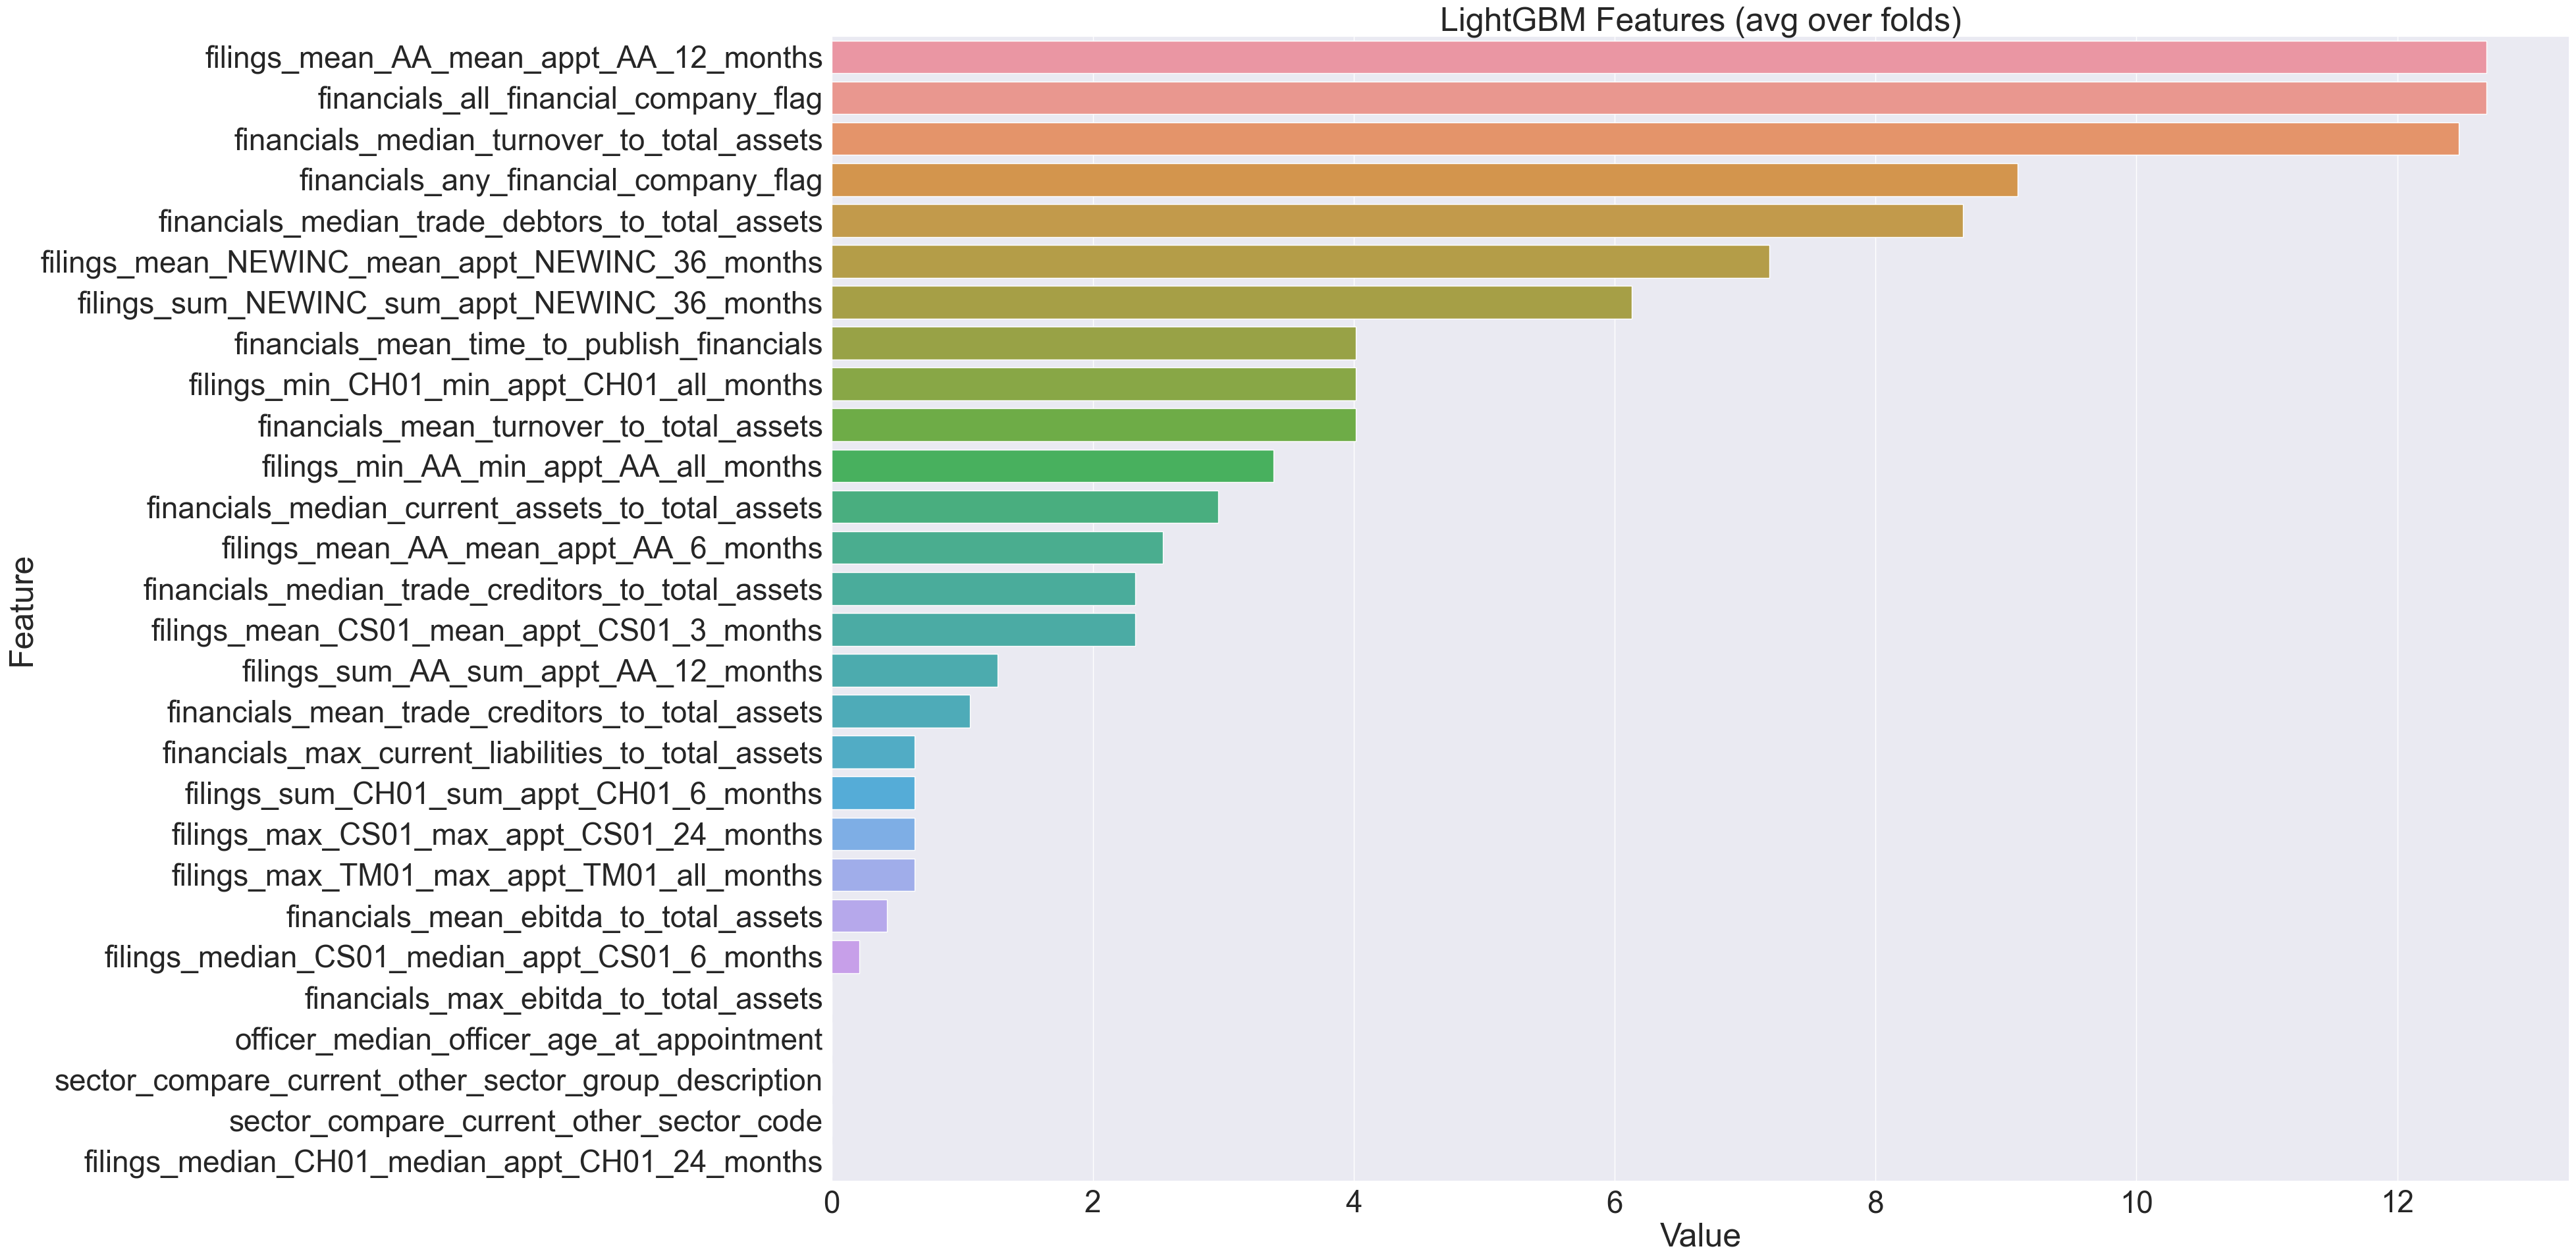

In [38]:
plotImp(clf_lgbm, val_data.data)

In [39]:
feat_for_test_set = list(train_data.data.columns)

In [40]:
test_data_feat_selected = test_data_wo_meta_cols[feat_for_test_set + ["label"]]
X_test, y_test = create_target_and_estimators(df=test_data_feat_selected, target_name="label")

In [41]:
test_data = lightgbm.Dataset(data=X_test,
                             label=y_test,
                             feature_name=feats_selected,
                             categorical_feature=cat_feats_selected
                             )


In [42]:
print(f"train : {compute_dataset_gini(clf_lgbm, train_data.data, train_data.label)}")
print(f"val : {compute_dataset_gini(clf_lgbm, val_data.data, val_data.label)}")
print(f"test : {compute_dataset_gini(clf_lgbm, test_data.data, test_data.label)}")



train : 0.27165604309021396
val : 0.18142985036449666
test : 0.04260528893241933


In [1]:
train_auc = (0.2716+1)/2
train_auc

0.6358

In [2]:
val_auc = (0.1814+1)/2
val_auc

0.5907